In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Linear Regression 
using Best Linear Unbiased Estimation (BLUE) 
### y(x) = x * weights_vector + error_vector 

In [2]:
def get_linear_weights(X, y):
    X_ = np.hstack([np.ones((X.shape[0],1)),X])
    w = np.linalg.inv(X_.T.dot(X_)).dot((X_.T).dot(y))
    return w.flatten()

In [3]:
def get_linear_approx(X_train, y):
    w = get_linear_weights(X_train, y)
    dot = lambda t: w[1:].dot(t)
    return lambda z: w[0] + np.apply_along_axis(func1d=dot,
                                                axis=1,
                                                arr=np.expand_dims(z,axis=1) if len(z.shape)==1 else z)

First example:

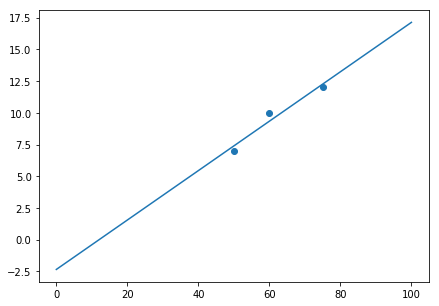

In [4]:
X_train = np.array([[60], [50], [75]])
y_train = np.array([10, 7, 12])

f = get_linear_approx(X_train, y_train)
x = np.linspace(0, 100, 1000)

plt.figure(figsize=(7,5))
plt.plot(x, f(x))
plt.scatter(X_train.reshape((3)), y_train.reshape((3)))

Uniformly generated example:

In [5]:
X_train = np.random.uniform(size=(100,2))
y_train = np.random.uniform(size=(100,1))

f = get_linear_approx(X_train, y_train)
x = np.random.normal(size=(100,2))

print(f(x[3:14,:])) # print 11 answers

[ 0.3475156   1.01705654  0.66250425  1.32582126  0.6400199  -0.36700078
  0.13058605  0.64262081  0.38104818  0.45198211  0.09292706]


Boston houses dataset example:

In [6]:
data = np.array(pd.read_csv('data/boston_houses.csv'))
X = data[:,1:]
y = data[:,0]

print(get_linear_weights(X, y)) # print linear function coefficients

[ -3.65580429  -0.2163955    0.0737306    4.41245058 -25.46844878
   7.14320155  -1.30108768]


# Perceptron

In [77]:
def get_perceptron_weights(X, y, w_init=None):
    w = np.random.uniform(size=(X.shape[1] + 1)) if w_init is None else w_init
    percept = lambda x, w: 1 if w.dot(x) > 0 else 0
    perfect = False

    while not perfect:
        perfect = True

        for i in range(X.shape[0]):
            x = np.hstack([[1], X[i]])
            pred = percept(x, w)

            if pred != y[i]:
                perfect = False
                w += x if pred == 0 else (-x)

    return w

In [78]:
def get_perceptron(X, y, w_init=None):
    w = get_perceptron_weights(X, y, w_init)
    return lambda x: 1 if w.dot(np.hstack([[1], x])) > 0 else 0

Logical AND function example:

In [84]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 0, 0, 1])
p = get_perceptron(X, y)

for x in X[:]:
    print('{} ~> {}'.format(x, p(x)))

[0 0] ~> 0
[0 1] ~> 0
[1 0] ~> 0
[1 1] ~> 1
